In [1]:
% matplotlib inline
# encoding:utf-8
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### 按照函数sin构造数据，加上一定噪声，学习模型拟合函数

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


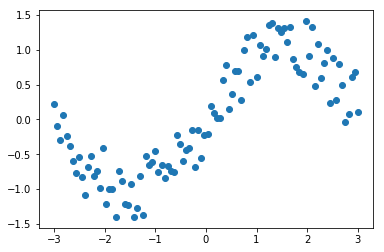

In [2]:
plt.ion()
n_observations = 100
fig, ax = plt.subplots(1, 1)
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
ax.scatter(xs, ys)
fig.show()
plt.draw()

### 设置使用GPU设备
```
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
```

In [3]:
graph = tf.Graph() # 自定义Graph 可以不设置
with graph.as_default():
    # 定义模型输入和目标
    input_X = tf.placeholder(tf.float32, name="input_X")
    input_Y = tf.placeholder(tf.float32, name="input_Y")
    # 定义权重变量
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
    # 定义计算函数
    Y_pred = tf.add(tf.multiply(input_X, W, name="mul"), b, name="add")
    # 定义损失函数
    cost = tf.reduce_sum(tf.pow(Y_pred - input_Y, 2)) / (100 - 1)
    tf.summary.scalar('cost', cost)
    # 使用优化方法，定义参数更新过程
    learning_rate = 0.01
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    merged = tf.summary.merge_all() # 方便使用TensorBoard

In [4]:
n_epochs = 50
# 创建Session
with tf.Session(graph=graph) as sess:
    train_writer = tf.summary.FileWriter('linear/train', sess.graph)
    sess.run(tf.global_variables_initializer()) # 初始化参数

    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={input_X: x, input_Y: y})
        summary, training_cost = sess.run([merged, cost], feed_dict={input_X: xs, input_Y: ys})
        train_writer.add_summary(summary, epoch_i)
        print(training_cost)
        
        if epoch_i % 20 == 0:
            ax.plot(xs, Y_pred.eval(feed_dict={input_X: xs}, session=sess), 'k', alpha= epoch_i / n_epochs)
            fig.show()
            plt.draw()
            
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        prev_training_cost = training_cost
#fig.show()
#plt.draw()

2.25272
2.02267
1.81939
1.63976
1.48103
1.34076
1.21682
1.10729
1.0105
0.924975
0.849396
0.782606
0.723584
0.671425
0.62533
0.584596
0.548597
0.516783
0.488666
0.463817
0.441855
0.422444
0.405289
0.390125
0.376723
0.364876
0.354404
0.345148
0.336965
0.329731
0.323336
0.317682
0.312682
0.308262
0.304353
0.300897
0.29784
0.295137
0.292745
0.29063
0.288759
0.287103
0.285638
0.284342
0.283194
0.282178
0.281279
0.280483
0.279778
0.279153
